In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as s

In [11]:
!ls ../results/'Bacteria_DNA_results.csv'


../results/Bacteria_DNA_results.csv


### Load  main results

In [12]:
all_file = '../results/Bacteria_DNA_results.csv'
df_all = pd.read_csv(all_file)

resultsfile = '../results/ANI_holdout_results.csv'
df_ho = pd.read_csv(resultsfile)

print(len(df_ho))
df_ho.tail()

160


,label,label_tax,pool_label,pool_tax,holdout,Baltimore,N,features,k,AUC,Acc,Spec,Sens,FDR,TP,TN,FP,FN
155,Bacillaceae,family,Bacillales,order,Siphoviridae,DNA,156,AA,3,0.932,0.50,0.00,1.0,0.50,20,0,20,0
156,Bacillaceae,family,Bacillales,order,Siphoviridae,DNA,156,AA,4,0.915,0.50,0.00,1.0,0.50,20,0,20,0
157,Bacillaceae,family,Bacillales,order,Siphoviridae,DNA,156,PC,5,0.880,0.50,0.00,1.0,0.50,20,0,20,0
158,Bacillaceae,family,Bacillales,order,Siphoviridae,DNA,156,PC,6,0.845,0.50,0.00,1.0,0.50,20,0,20,0
159,Bacillaceae,family,Bacillales,order,Siphoviridae,DNA,156,Domains,0,0.595,0.47,0.15,0.8,0.52,16,3,17,4


In [13]:
df_all.rename(columns = {'label_tax':'tax','Features':'features'}, inplace=True)
df_ho.rename(columns = {'label_tax':'tax',}, inplace=True)
fs_order =['DNA_2','DNA_6','DNA_9','AA_3','AA_4','PC_5','PC_6','Domains_0']
labels = df_ho['label'].unique()
df_all = df_all[df_all['label'].isin(labels)]
#df_all = df_all[df_all['feature set'].isin(fs_order)]
df_all['holdout'] = df_all.apply(lambda row: 'none', axis =1)

In [14]:

df_ho.head(20)

,label,tax,pool_label,pool_tax,holdout,Baltimore,N,features,k,AUC,Acc,Spec,Sens,FDR,TP,TN,FP,FN
0,Firmicutes,phylum,Bacteria,kingdom,Siphoviridae,DNA,416,DNA,2,0.628,0.55,0.70,0.40,0.43,8,14,6,12
1,Firmicutes,phylum,Bacteria,kingdom,Siphoviridae,DNA,416,DNA,6,0.985,0.93,1.00,0.85,0.00,17,20,0,3
2,Firmicutes,phylum,Bacteria,kingdom,Siphoviridae,DNA,416,DNA,9,0.992,0.93,1.00,0.85,0.00,17,20,0,3
3,Firmicutes,phylum,Bacteria,kingdom,Siphoviridae,DNA,416,AA,3,0.992,0.95,0.95,0.95,0.05,19,19,1,1
4,Firmicutes,phylum,Bacteria,kingdom,Siphoviridae,DNA,416,AA,4,0.987,0.85,1.00,0.70,0.00,14,20,0,6
5,Firmicutes,phylum,Bacteria,kingdom,Siphoviridae,DNA,416,PC,5,0.982,0.90,0.95,0.85,0.06,17,19,1,3
6,Firmicutes,phylum,Bacteria,kingdom,Siphoviridae,DNA,416,PC,6,0.987,0.88,1.00,0.75,0.00,15,20,0,5
7,Firmicutes,phylum,Bacteria,kingdom,Siphoviridae,DNA,416,Domains,0,0.857,0.75,0.55,0.95,0.32,19,11,9,1
8,Proteobacteria,phylum,Bacteria,kingdom,Siphoviridae,DNA,435,DNA,2,0.638,0.62,0.35,0.90,0.42,18,7,13,2
9,Proteobacteria,phylum,Bacteria,kingdom,Siphoviridae,DNA,435,DNA,6,0.910,0.85,0.80,0.90,0.18,18,16,4,2


In [15]:
def make_df_ok(df,ho):    
    df.replace('Domains_1','Domains',inplace=True)
    concat_ds = lambda row: '_'.join([row["holdout"],row["label"],ho])
    df['dataset']= df.apply(concat_ds , axis=1)
    
    tax_order =['kingdom','phylum','class','order','family','genus','species']
    df['tax'] = df['tax'].astype('category')
    df['tax'].cat.set_categories(tax_order, inplace=True)
    
    fs = lambda row: f'{row["features"]}_{row["k"]}'
    df['feature set'] = df.apply(fs,axis = 1)
   # df.replace('Domains_0','Domains')
    fs_order =['DNA_2','DNA_6','DNA_9','AA_3','AA_4','PC_5','PC_6','Domains_0']
    df['feature set'] = df['feature set'].astype('category')
    df['feature set'].cat.set_categories(fs_order, inplace=True)
    labels = df_ho['label'].unique()
    df = df[df['label'].isin(labels)]
    df = df[df['feature set'].isin(fs_order)]
    return df

In [16]:
df_ho = make_df_ok(df_ho,'ho')
df_ho.head()

,label,tax,pool_label,pool_tax,holdout,Baltimore,N,features,k,AUC,Acc,Spec,Sens,FDR,TP,TN,FP,FN,dataset,feature set
0,Firmicutes,phylum,Bacteria,kingdom,Siphoviridae,DNA,416,DNA,2,0.628,0.55,0.70,0.40,0.43,8,14,6,12,Siphoviridae_Firmicutes_ho,DNA_2
1,Firmicutes,phylum,Bacteria,kingdom,Siphoviridae,DNA,416,DNA,6,0.985,0.93,1.00,0.85,0.00,17,20,0,3,Siphoviridae_Firmicutes_ho,DNA_6
2,Firmicutes,phylum,Bacteria,kingdom,Siphoviridae,DNA,416,DNA,9,0.992,0.93,1.00,0.85,0.00,17,20,0,3,Siphoviridae_Firmicutes_ho,DNA_9
3,Firmicutes,phylum,Bacteria,kingdom,Siphoviridae,DNA,416,AA,3,0.992,0.95,0.95,0.95,0.05,19,19,1,1,Siphoviridae_Firmicutes_ho,AA_3
4,Firmicutes,phylum,Bacteria,kingdom,Siphoviridae,DNA,416,AA,4,0.987,0.85,1.00,0.70,0.00,14,20,0,6,Siphoviridae_Firmicutes_ho,AA_4


In [17]:
df_all= make_df_ok(df_all,'all')
df_all.head()

,label,tax,pool_label,pool_tax,Baltimore,N,features,k,AUC,Acc,Spec,Sens,FDR,TP,TN,FP,FN,holdout,dataset,feature set
181,Enterobacterales,order,Gammaproteobacteria,class,DNA,771,DNA,2,0.728,0.72,0.57,0.87,0.33,85,54,41,13,none,none_Enterobacterales_all,DNA_2
185,Enterobacterales,order,Gammaproteobacteria,class,DNA,771,DNA,6,0.997,0.96,0.98,0.95,0.02,93,93,2,5,none,none_Enterobacterales_all,DNA_6
188,Enterobacterales,order,Gammaproteobacteria,class,DNA,771,DNA,9,0.995,0.97,0.98,0.97,0.02,95,93,2,3,none,none_Enterobacterales_all,DNA_9
191,Enterobacterales,order,Gammaproteobacteria,class,DNA,771,AA,3,0.993,0.96,0.96,0.96,0.04,94,91,4,4,none,none_Enterobacterales_all,AA_3
192,Enterobacterales,order,Gammaproteobacteria,class,DNA,771,AA,4,0.988,0.95,0.96,0.94,0.04,92,91,4,6,none,none_Enterobacterales_all,AA_4


In [18]:
df_all['feature set'].unique()

[DNA_2, DNA_6, DNA_9, AA_3, AA_4, PC_5, PC_6, Domains_0]
Categories (8, object): [DNA_2, DNA_6, DNA_9, AA_3, AA_4, PC_5, PC_6, Domains_0]

In [19]:

df = pd.concat([df_all,df_ho], axis = 0, sort=False)[df_ho.columns]
df.head()

,label,tax,pool_label,pool_tax,holdout,Baltimore,N,features,k,AUC,Acc,Spec,Sens,FDR,TP,TN,FP,FN,dataset,feature set
181,Enterobacterales,order,Gammaproteobacteria,class,none,DNA,771,DNA,2,0.728,0.72,0.57,0.87,0.33,85,54,41,13,none_Enterobacterales_all,DNA_2
185,Enterobacterales,order,Gammaproteobacteria,class,none,DNA,771,DNA,6,0.997,0.96,0.98,0.95,0.02,93,93,2,5,none_Enterobacterales_all,DNA_6
188,Enterobacterales,order,Gammaproteobacteria,class,none,DNA,771,DNA,9,0.995,0.97,0.98,0.97,0.02,95,93,2,3,none_Enterobacterales_all,DNA_9
191,Enterobacterales,order,Gammaproteobacteria,class,none,DNA,771,AA,3,0.993,0.96,0.96,0.96,0.04,94,91,4,4,none_Enterobacterales_all,AA_3
192,Enterobacterales,order,Gammaproteobacteria,class,none,DNA,771,AA,4,0.988,0.95,0.96,0.94,0.04,92,91,4,6,none_Enterobacterales_all,AA_4


In [20]:
df.dataset.unique()

array(['none_Enterobacterales_all', 'none_Pseudomonadales_all',
       'none_Proteobacteria_all', 'none_Bacillaceae_all',
       'none_Bacillales_all', 'none_Lactobacillales_all',
       'none_Firmicutes_all', 'none_Cyanobacteria_all',
       'Siphoviridae_Firmicutes_ho', 'Siphoviridae_Proteobacteria_ho',
       'Podoviridae_Cyanobacteria_ho', 'Podoviridae_Firmicutes_ho',
       'Podoviridae_Proteobacteria_ho', 'Myoviridae_Cyanobacteria_ho',
       'Myoviridae_Firmicutes_ho', 'Myoviridae_Proteobacteria_ho',
       'Siphoviridae_Bacillales_ho', 'Myoviridae_Bacillales_ho',
       'Podoviridae_Bacillales_ho', 'Siphoviridae_Lactobacillales_ho',
       'Myoviridae_Lactobacillales_ho',
       'Siphoviridae_Enterobacterales_ho',
       'Podoviridae_Enterobacterales_ho',
       'Myoviridae_Enterobacterales_ho', 'Myoviridae_Pseudomonadales_ho',
       'Podoviridae_Pseudomonadales_ho',
       'Siphoviridae_Pseudomonadales_ho', 'Siphoviridae_Bacillaceae_ho'],
      dtype=object)

In [21]:
df.sort_values(by = ['tax','label'],inplace=True)
unique = df.dataset.unique()

In [22]:
df.replace('Domains_0','Domains',inplace=True)
fs_order =['DNA_2','DNA_6','DNA_9','AA_3','AA_4','PC_5','PC_6','Domains']
df['feature set'] = df['feature set'].astype('category')
df['feature set'].cat.set_categories(fs_order, inplace=True)
df['feature set'].unique()

[DNA_2, DNA_6, DNA_9, AA_3, AA_4, PC_5, PC_6, Domains]
Categories (8, object): [DNA_2, DNA_6, DNA_9, AA_3, AA_4, PC_5, PC_6, Domains]

In [23]:
dfp = df.pivot('dataset', 'feature set', 'AUC').reindex(unique)
dfp.head()

feature set,DNA_2,DNA_6,DNA_9,AA_3,AA_4,PC_5,PC_6,Domains
dataset,,,,,,,,
none_Cyanobacteria_all,0.916,0.996,0.990,0.994,0.982,0.987,0.984,0.990
Podoviridae_Cyanobacteria_ho,0.675,0.882,0.895,0.988,0.895,0.952,0.805,0.772
Myoviridae_Cyanobacteria_ho,0.935,1.000,1.000,1.000,1.000,1.000,1.000,0.950
none_Firmicutes_all,0.914,0.999,0.999,1.000,0.998,0.999,0.998,0.999
Siphoviridae_Firmicutes_ho,0.628,0.985,0.992,0.992,0.987,0.982,0.987,0.857


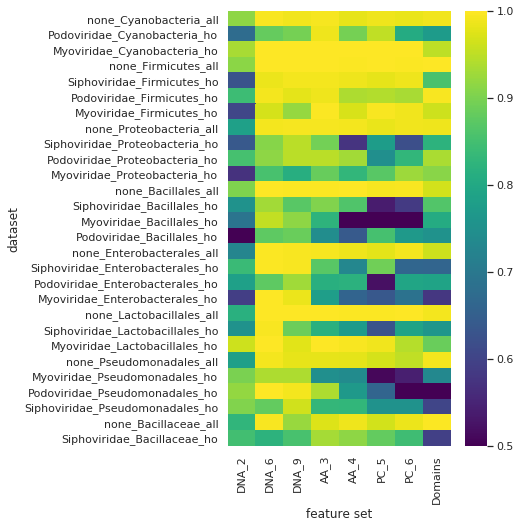

In [24]:
sns.set_context ('paper')
sns.set( palette = 'viridis')
f, ax = plt.subplots(figsize=(5, 8))
plt.xticks(rotation='vertical')
# ax.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     top=False,      # ticks along the bottom edge are off
#      bottom=False,         # ticks along the top edge are off
#     labelbottom=False
#     )
# ax.set_ylabel(ax.get_ylabel(), fontsize=25)
#ax.set_xlabel(ax.get_xlabel(), fontsize=25)
sns.heatmap(dfp,cmap = 'viridis', vmin = 0.5,   ax=ax)

In [25]:
# f.savefig('Figure_7A.svg', bbox_inches="tight")


# f.savefig('Figure_7A.png', dpi=300, bbox_inches="tight")

### Re-arrange  df to have a  ho_AUC and all_AUC and ratio/all for each dataset

In [27]:
ho_df = df[df.holdout!='none']
ho_df = ho_df.rename(columns={'AUC':'ho_AUC'})
all_df = df[df.holdout=='none']

all_df.head(10)


,label,tax,pool_label,pool_tax,holdout,Baltimore,N,features,k,AUC,Acc,Spec,Sens,FDR,TP,TN,FP,FN,dataset,feature set
1261,Cyanobacteria,phylum,Bacteria,superkingdom,none,DNA,208,DNA,2,0.916,0.83,0.85,0.81,0.16,21,22,4,5,none_Cyanobacteria_all,DNA_2
1265,Cyanobacteria,phylum,Bacteria,superkingdom,none,DNA,208,DNA,6,0.996,0.96,0.96,0.96,0.04,25,25,1,1,none_Cyanobacteria_all,DNA_6
1268,Cyanobacteria,phylum,Bacteria,superkingdom,none,DNA,208,DNA,9,0.990,0.92,0.92,0.92,0.08,24,24,2,2,none_Cyanobacteria_all,DNA_9
1271,Cyanobacteria,phylum,Bacteria,superkingdom,none,DNA,208,AA,3,0.994,0.94,0.92,0.96,0.07,25,24,2,1,none_Cyanobacteria_all,AA_3
1272,Cyanobacteria,phylum,Bacteria,superkingdom,none,DNA,208,AA,4,0.982,0.85,0.69,1.00,0.24,26,18,8,0,none_Cyanobacteria_all,AA_4
1277,Cyanobacteria,phylum,Bacteria,superkingdom,none,DNA,208,PC,5,0.987,0.92,0.88,0.96,0.11,25,23,3,1,none_Cyanobacteria_all,PC_5
1278,Cyanobacteria,phylum,Bacteria,superkingdom,none,DNA,208,PC,6,0.984,0.85,0.69,1.00,0.24,26,18,8,0,none_Cyanobacteria_all,PC_6
1279,Cyanobacteria,phylum,Bacteria,superkingdom,none,DNA,208,Domains,0,0.990,0.94,0.92,0.96,0.07,25,24,2,1,none_Cyanobacteria_all,Domains
961,Firmicutes,phylum,Bacteria,superkingdom,none,DNA,990,DNA,2,0.914,0.89,0.84,0.94,0.15,117,103,20,8,none_Firmicutes_all,DNA_2
965,Firmicutes,phylum,Bacteria,superkingdom,none,DNA,990,DNA,6,0.999,0.99,0.99,0.98,0.01,123,122,1,2,none_Firmicutes_all,DNA_6


### Add the AUC for the all classifier for each dataset
#### Calculate  ratio = ho_AUC/all_AUV

In [28]:
all_AUC =[]
for i,row in ho_df.iterrows():
    #print (all_df[(all_df['label']== row['label'] )& (all_df['feature set'] == row['feature set'])]['AUC'].item())
    #all_AUC.append (all_df[(all_df['label']== row['label'] )& (all_df['feature set'] == row['feature set'])]['AUC'].item())
    ho_df.at[i,'all_AUC'] =all_df[(all_df['label']== row['label'] )& (all_df['feature set'] == row['feature set'])]['AUC'].item()


ho_df['ratios']= ho_df.apply( lambda row:  row['ho_AUC']/row['all_AUC']  , axis=1)
ho_df['dataset']= ho_df.apply( lambda row: '_'.join(row['dataset'].split('_')[:-1]) , axis=1)

ho_df['feature set'].cat.set_categories(fs_order, inplace=True)
ho_df.head()

/home4/youn01f/Desktop/workspace/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  """


,label,tax,pool_label,pool_tax,holdout,Baltimore,N,features,k,ho_AUC,...,Sens,FDR,TP,TN,FP,FN,dataset,feature set,all_AUC,ratios
16,Cyanobacteria,phylum,Bacteria,kingdom,Podoviridae,DNA,156,DNA,2,0.675,...,0.85,0.35,17,11,9,3,Podoviridae_Cyanobacteria,DNA_2,0.916,0.736900
17,Cyanobacteria,phylum,Bacteria,kingdom,Podoviridae,DNA,156,DNA,6,0.882,...,0.40,0.00,8,20,0,12,Podoviridae_Cyanobacteria,DNA_6,0.996,0.885542
18,Cyanobacteria,phylum,Bacteria,kingdom,Podoviridae,DNA,156,DNA,9,0.895,...,0.80,0.11,16,18,2,4,Podoviridae_Cyanobacteria,DNA_9,0.990,0.904040
19,Cyanobacteria,phylum,Bacteria,kingdom,Podoviridae,DNA,156,AA,3,0.988,...,0.80,0.00,16,20,0,4,Podoviridae_Cyanobacteria,AA_3,0.994,0.993964
20,Cyanobacteria,phylum,Bacteria,kingdom,Podoviridae,DNA,156,AA,4,0.895,...,0.90,0.25,18,14,6,2,Podoviridae_Cyanobacteria,AA_4,0.982,0.911405


### Get genome representation colors

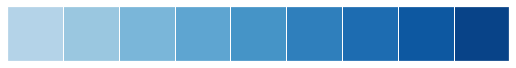

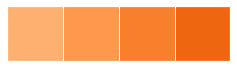

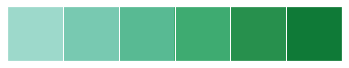

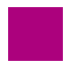

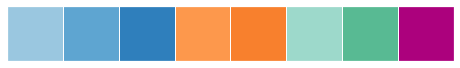

In [29]:
DNA_cols =  sns.color_palette('Blues',12)[3:12]
sns.palplot(DNA_cols)

AA_cols =  sns.color_palette('Oranges',10)[3:7]
sns.palplot(AA_cols)

PC_cols =  sns.color_palette('BuGn',10)[3:9]
sns.palplot(PC_cols)

dom_cols =  sns.color_palette('RdPu',7)[5:6]
sns.palplot(dom_cols)

all_cols =(DNA_cols + AA_cols + PC_cols + dom_cols)

rep_legend = [mpatches.Patch(color=all_cols[7], label= 'Nucleotide'),
              mpatches.Patch(color=all_cols[11], label= 'Amino Acid'),
                mpatches.Patch(color=all_cols[-4], label= 'Physio-chemical'),
                mpatches.Patch(color=all_cols[-1], label= 'Domain')
             ]
cols = [(4,3),(9,2),(-5,2),(-1,1)]
cols = [1,3,5,10,11,13,15,19]
#rep_pal = [all_cols[t[0]]   for t in cols for j in range(t[1])]
rep_pal = [all_cols[i] for  i in cols]
#g.axes[0].legend (handles= rep_legend, title = 'Genome representation',loc='lower righ
sns.palplot(rep_pal)


No handles with labels found to put in legend.


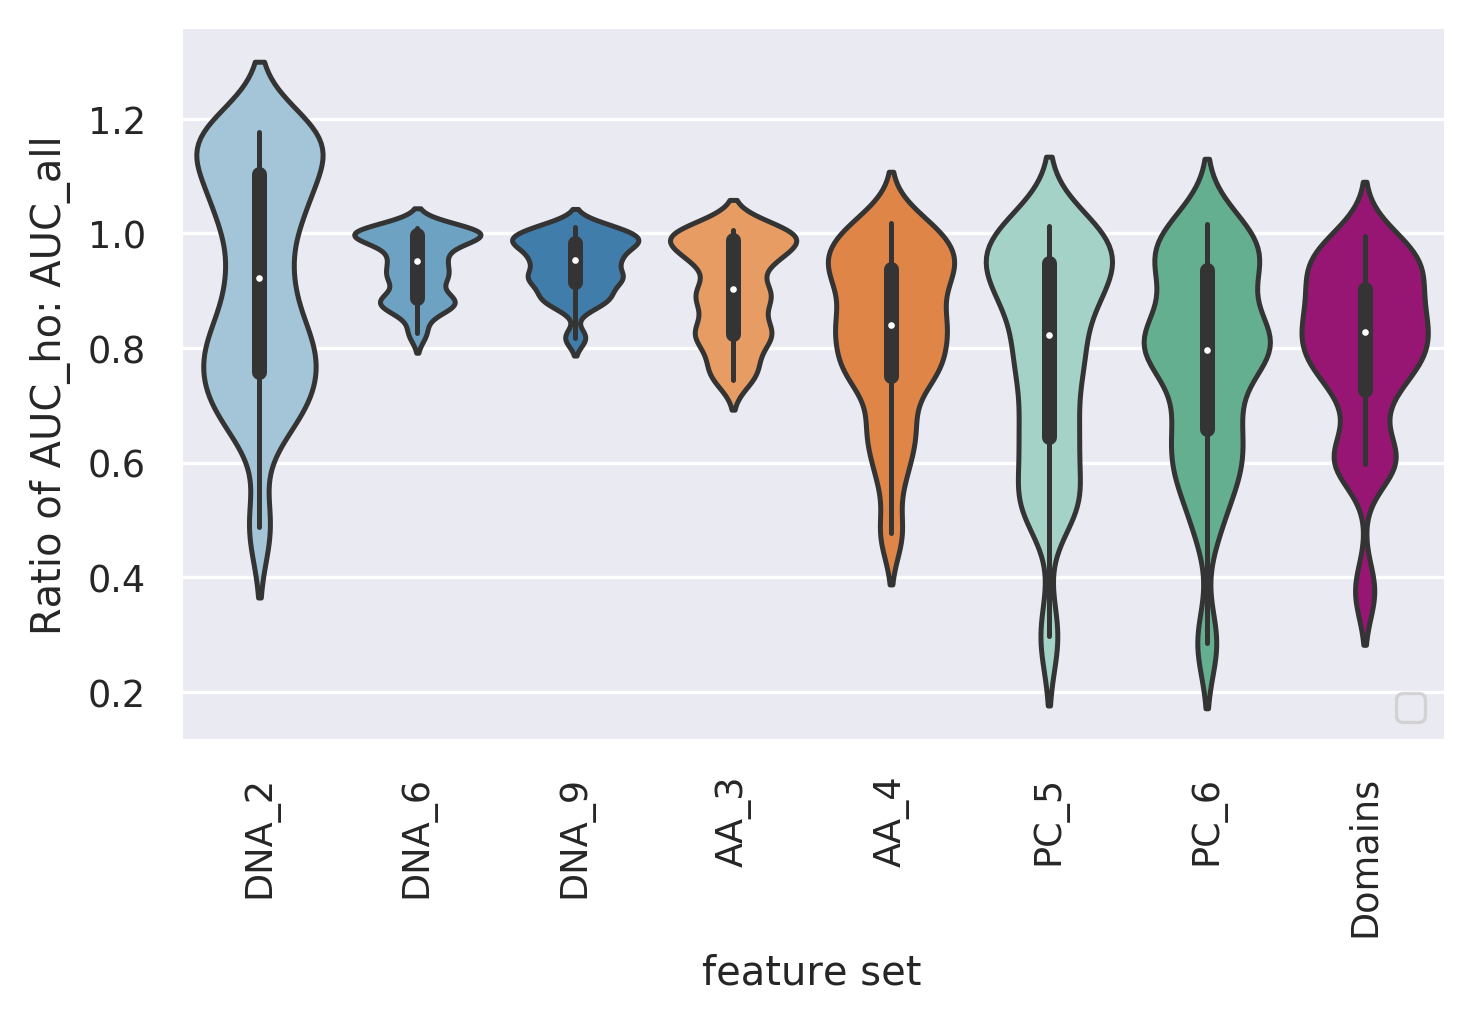

In [30]:
sns.set_context ('paper')

fig  = plt.figure(figsize=(5,3.5), dpi=300)

g= sns.violinplot( x = 'feature set', y ='ratios', palette = rep_pal,width = 0.8, bw = .3,scale = 'count',
               data = ho_df)
fig = g.get_figure()
plt.legend(loc='lower right')
sns.despine()
plt.xticks(rotation='vertical')
plt.ylabel ( 'Ratio of AUC_ho: AUC_all' )
sns.despine()
plt.tight_layout()


In [260]:
#fig.savefig('Figure_7B.tiff', bbox_inches="tight")

In [39]:
#fig.savefig('ho_boxplots.png', dpi=400)